# Печь Ванюкова
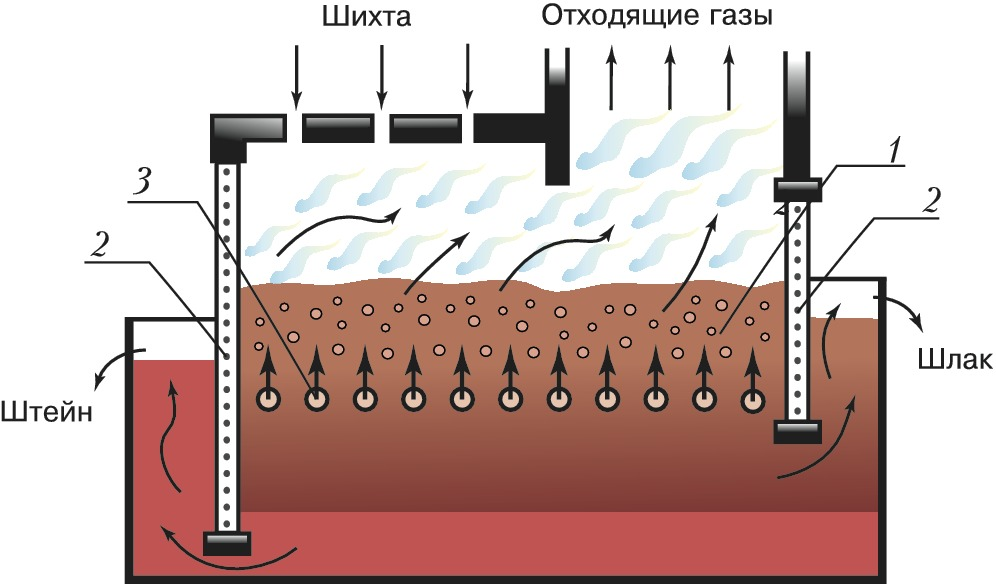
1 - ванна с расплавом, 2 - кессоны(водоохлаждаемые элементы печи для регуляции температуры), 3 - фурмы для подачи дутья


<div style="font-size: 20px">
    Ванюкова процесс(процесс плавки в расплаве)<div/><div style="font-size: 17px"> - непрерывный пирометаллургический процесс переработки природного сырья, промежуточных продуктов металлругического производства, промышленных и бытовых отходов с получением жидких и газообразных продуктов.<div/>
Печь представляет собой прямоугольную ванну (шириной 1.5-2.5 м, высотой 6-6.5 м, длиной 4-30 м), ограждение шахты выполнено из охлаждаемых водой кессонов для продления эксплуатационного цикла печи. В средней части стенок расположены фурмы для подачи дутья(воздуха, обогащенного до 90% кислородом), в торцевых стенах - сифоны для непрерывного удаления щлака и штейна. Отходящие газы поднимаются в котёл-утилизатор.

# Технология плавки
<div style="font-size: 17px">
    Перерабатываемую шихту размером частиц от 0.045 до 100 мм и кислородсодержащее дутьё подают непосредственно в ванну с расплавленным шлаком, в которой происходит плавка и окисление шихты. Дутьё разделяет шлак на верхнюю перемешиваемую газом зону и нижнюю - зону спокойного шлака. В верхней зоне дутьё создаёт энергичное турбулентное движение, благодаря которому тепло- и массообмен между твёрдыми частицами, расплавом и газом ускоряется в сотни раз. 
<div/>

<div style="font-size: 17px">
    Необходимая для плавки теплота генерируется в ходе экзометрической реакции окисления шихты ксислородом дутья и добавляетсямого углеродсодержащего топлива. В перемешиваемой зоне в результате многократных соударений происходит укрупнение образующихся капель штейна (или металла), которые опускаются через нижнюю зону спокойного шлака, образуя донный слой, а газообразные продукты плавки поднимаются снизу(от места введения дутья в расплав) вверх. 
    <div/>

<div style="font-size: 17px">
   Основное достоинство процесса Ванюкова - высокая производительность, а также возможность вести плавку до штейна или металла с полной утилизацией всех полезных составляющих сырья. В получаемом штейне содержание меди достигает 45-66%, что является очень высоким показателем. Кроме того, на выходе можно получать богатый серосодержащий отходящий газ. 
    <div/>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%config InlineBackend.figure_formats = ['svg']
from math import sqrt
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, learning_curve, cross_val_score, KFold
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.utils import resample
from statsmodels.stats.stattools import durbin_watson
from sklearn.pipeline import make_pipeline, Pipeline
import warnings
warnings.filterwarnings('ignore')


In [2]:
stein = pd.read_csv('stein.csv')
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')
data3 = pd.read_csv('data3.csv')

# Data Processing

In [3]:
data1.head()

,дата,"давление КВС, точка1","давление КВС, точка2",давление природный газ,"конвейер 31, производительность","конвейер 31, скорость","конвейер 32, производительность","конвейер 32, скорость","питатель1, уровень","питатель1, скорость",...,расход КВС,расход природного газа,содержание кислорода в КВС,температура КВС,температура отходящих газов в аптейке,"температура пода, шлаковый сифон","температура пода, штейновый сифон","температура пода, зона плавления, точка1","температура пода, зона плавления, точка2",температура природного газа
0,2008-01-01 00:00:00,94.61163,89.96935,90.89191,40.92230,99.77778,0.0,100.0,1.878641,20.24903,...,26914.07,1205.887,71.71277,35.58954,920.1882,0.000000,321.6187,512.4546,497.8037,35.34047
1,2008-01-01 00:01:00,94.55274,89.84175,92.90390,70.85909,99.77778,0.0,100.0,1.926321,20.24903,...,27213.05,1272.178,68.33263,35.48574,920.1112,0.000000,321.8761,512.6711,497.5535,35.31971
2,2008-01-01 00:03:00,94.17488,89.90555,98.10071,79.04680,99.62963,0.0,100.0,2.112779,20.25819,...,25896.55,1229.996,72.25453,35.36121,919.8026,0.011426,322.3917,513.1042,497.1181,35.29891
3,2008-01-01 00:04:00,93.11000,88.28123,93.09038,78.12030,99.70370,0.0,100.0,2.132704,20.25819,...,27144.66,1289.244,68.84102,35.13288,919.6483,0.035913,322.6865,513.3568,496.8715,35.31971
4,2008-01-01 00:05:00,96.29974,91.65254,96.33900,80.74904,99.55556,0.0,100.0,2.143212,20.25513,...,27016.32,1255.048,72.44690,35.02908,919.6100,0.005095,322.8336,513.5372,496.7272,35.29891


In [4]:
#Убираю 0 и 1 неподходящюю строку 
data1 = data1.drop([0,1], axis = 0).reset_index(drop = True)
data2 = data2.drop([0,1], axis = 0).reset_index(drop = True)
data3 = data3.drop([0,1], axis = 0).reset_index(drop = True)

In [5]:
#Объединяю 3 таблицы данных в одну
data = data1.append(data2).append(data3).reset_index(drop = True)

In [6]:
#дата в данных была типа 'object' 
data['дата'] = data['дата'].astype('datetime64[ns]')
stein['дата'] = stein['дата'].astype('datetime64[ns]')
#данные со штейна снимались на день дольше, чем основные
stein = stein[stein['дата']<data['дата'].max()]

In [7]:
#Дружу данные со штейном
df = data.merge(stein.drop('номер измерения', axis =1), on = 'дата' , how = 'outer')

In [8]:
#убраю строки только с замерами штейна, без значений аппаратов.
df[df['давление КВС, точка1'].notna()].head()

,дата,"давление КВС, точка1","давление КВС, точка2",давление природный газ,"конвейер 31, производительность","конвейер 31, скорость","конвейер 32, производительность","конвейер 32, скорость","питатель1, уровень","питатель1, скорость",...,температура отходящих газов в аптейке,"температура пода, шлаковый сифон","температура пода, штейновый сифон","температура пода, зона плавления, точка1","температура пода, зона плавления, точка2",температура природного газа,[Cu],[Ni],[Fe],[S]
0,2008-01-01 00:03:00,94.17488,89.90555,98.10071,79.04680,99.62963,0.0,100.0,2.112779,20.25819,...,919.8026,0.011426,322.3917,513.1042,497.1181,35.29891,NaN,NaN,NaN,NaN
1,2008-01-01 00:04:00,93.11000,88.28123,93.09038,78.12030,99.70370,0.0,100.0,2.132704,20.25819,...,919.6483,0.035913,322.6865,513.3568,496.8715,35.31971,NaN,NaN,NaN,NaN
2,2008-01-01 00:05:00,96.29974,91.65254,96.33900,80.74904,99.55556,0.0,100.0,2.143212,20.25513,...,919.6100,0.005095,322.8336,513.5372,496.7272,35.29891,NaN,NaN,NaN,NaN
3,2008-01-01 00:06:00,95.09745,90.76923,98.56690,77.60523,99.70370,0.0,100.0,2.146185,20.24903,...,919.4557,0.000000,323.1280,513.7177,496.5839,35.29891,NaN,NaN,NaN,NaN
4,2008-01-01 00:07:00,94.52821,89.78777,94.44969,75.12725,99.48148,0.0,100.0,2.131316,20.24903,...,919.3016,0.000000,323.3487,513.9341,496.3657,35.27818,NaN,NaN,NaN,NaN


In [9]:
df1 = data.merge(stein.drop('номер измерения', axis =1), on = 'дата' , how = 'inner') # простое обьединение значений
                                                                                      # c одним и тем же временем

In [10]:
df1 = df1.dropna().reset_index(drop = True)
df1.head()

,дата,"давление КВС, точка1","давление КВС, точка2",давление природный газ,"конвейер 31, производительность","конвейер 31, скорость","конвейер 32, производительность","конвейер 32, скорость","питатель1, уровень","питатель1, скорость",...,температура отходящих газов в аптейке,"температура пода, шлаковый сифон","температура пода, штейновый сифон","температура пода, зона плавления, точка1","температура пода, зона плавления, точка2",температура природного газа,[Cu],[Ni],[Fe],[S]
0,2008-01-01 01:00:00,97.57563,92.91371,99.08217,76.45261,99.40741,0.0,100.0,3.976667,20.25208,...,913.9077,0.044893,330.1903,519.5614,497.8037,35.46500,65.1,3.73,9.0,22.0
1,2008-01-01 03:00:00,96.97694,92.14818,94.77848,73.87099,99.70370,0.0,100.0,4.040802,24.25916,...,911.1365,0.000000,329.2344,519.2008,496.6901,35.40271,64.6,3.74,9.4,22.2
2,2008-01-01 05:00:00,97.31064,92.36410,90.27850,78.19254,99.25926,0.0,100.0,1.364270,22.25410,...,909.9440,0.023056,329.3814,520.5351,495.5406,34.53092,61.6,3.65,10.9,22.8
3,2008-01-01 07:00:00,96.77084,91.86356,96.07891,68.95585,99.25926,0.0,100.0,3.823516,21.26530,...,910.2903,0.000000,328.3155,523.9964,510.5779,34.28186,59.2,3.52,13.6,23.1
4,2008-01-01 09:00:00,98.65033,94.38589,94.76867,53.46925,99.55556,0.0,100.0,1.053408,0.00000,...,907.3678,0.000000,327.2856,520.7154,497.0496,32.53829,55.0,3.49,16.9,23.8


In [11]:
# буду использовать таблицу, полученную простым объединением данных в одно и то же время
#Создаю столбец совместной работы двух конвейеров
df1['Производительность Конвейера 31 и Конвейера 32'] = df1['конвейер 31, производительность'].values\
                                                        + df1['конвейер 32, производительность'].values

In [12]:
#столбец среднего двух точек измерений температур
df1['температура пода, зона плавления'] = (df1['температура пода, зона плавления, точка1']\
                                        +df1['температура пода, зона плавления, точка2'])/2

In [13]:
df1 = df1.rename(columns = {'Производительность Конвейера 31 и Конвейера 32':'Суммарный расход шихты'})

In [14]:
X = df1[['Суммарный расход шихты','расход КВС','содержание кислорода в КВС',\
         'температура пода, зона плавления','температура отходящих газов в аптейке']]
Y = df1['[Cu]']

Нормальность

Линейность

Гомоскедастичность

Автокорреляция

# First train, StandardScaler


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [16]:
#Создание оценщика и score функции
def rmse(y_actual, y_predicted):
    return mean_squared_error(y_actual, y_predicted,squared=False)
rmse_scorer_train = make_scorer(rmse, greater_is_better=False)
rmse_scorer_plot = make_scorer(rmse)
def score_mae_rmse(pipeline):
    y_pred = pipeline.fit(X_train,y_train).predict(X_test)
    RMSE = mean_squared_error(y_test,y_pred,squared=False)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    return [MAE, RMSE]

In [17]:
def err_DF():
    models = [lin_regr, lin_sgd, dec_tree, rand_forest]
    arr_MAE =[]
    arr_RMSE=[]
    for model in models:
        arr_MAE.append(score_mae_rmse(model)[0])
        arr_RMSE.append(score_mae_rmse(model)[1])
    return round(pd.DataFrame({'Model':['LinearRegression','SGD','DT','RF'],'MAE':arr_MAE,'RMSE':arr_RMSE}),3)   

In [18]:
#Linear Regression 
lin_regr = Pipeline([('scaler', StandardScaler()), ('model',LinearRegression())])
#SGD
lin_sgd = Pipeline([('scaler', StandardScaler()), ('model',SGDRegressor(tol = 0.0001, eta0 = 0.01,random_state=0))])
#Decision Tree
search_tree = RandomizedSearchCV(tree.DecisionTreeRegressor(), {'max_depth':range(2,10),\
                                                      'min_samples_split':range(1,10),'min_samples_leaf':range(2,10),\
                                                      'random_state':[0]},n_jobs =-1)
dec_tree = Pipeline([('scaler', StandardScaler()), ('model',search_tree)])
#Random Forest
search_forest = RandomizedSearchCV(RandomForestRegressor(), {'n_estimators':[500,600,700,900,1000,1200,1400,1600,1800,2000],\
                                                             'max_depth':range(1,10),'min_samples_split':range(2,20),\
                                                             'min_samples_leaf':range(2,20),\
                                                             'random_state':[0]},n_jobs =-1,scoring=rmse_scorer_plot)
rand_forest = Pipeline([('scaler', StandardScaler()), ('model',search_forest)])

In [19]:
df_errors = err_DF()

In [21]:
#Проверка на автокорреляцию
#Около 2 - автокорреляция отсутствует 
# Perform Durbin-Watson test
dw_result = durbin_watson(y_train-lin_regr.fit(X_train,y_train).predict(X_train))
dw_result

1.928193226744991

In [22]:
#функция для построения графиков на bootstrap выборках для коэффициентов линейных моделей
def lin_coef_plot(pipeline, model_name):
    n_bootstraps = 1000 
    bootstrap_X = [] 
    bootstrap_y = [] 
    for _ in range(n_bootstraps):
        sample_X, sample_Y = resample(X, Y)
        bootstrap_X.append(sample_X)
        bootstrap_y.append(sample_Y)
    coeffs = []
    for i, data in enumerate(bootstrap_X):
        pipeline.fit(data, bootstrap_y[i])
        coeffs.append(pipeline['model'].coef_)
    coef_df = pd.DataFrame(coeffs, columns = list(X))
    coef_df.plot(kind= 'box')
    plt.title(f'Coefficient values {model_name}')
    plt.xticks(rotation = 90);        

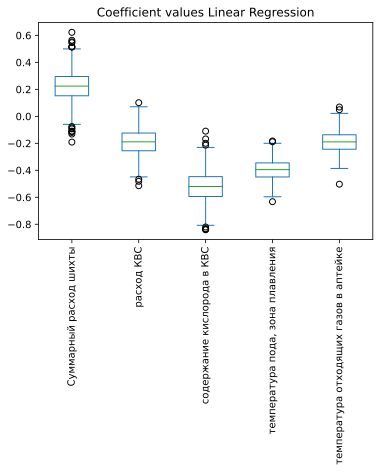

In [23]:
lin_coef_plot(lin_regr, 'Linear Regression')

In [ ]:
lin_coef_plot(lin_sgd, 'SGDRegressor')

In [24]:
#функция построения графиков коэффициентов нелинейных моделей
def woody_coefs_plot(pipeline, model_name):
    feature_importances = pipeline['model'].best_estimator_.feature_importances_
    indices = np.argsort(feature_importances)
    fig, ax = plt.subplots()
    ax.barh(range(len(feature_importances)), feature_importances[indices])
    ax.set_yticks(range(len(feature_importances)))
    _=ax.set_yticklabels(np.array(list(X))[indices])
    plt.title(f'Feature importances {model_name}');

In [ ]:
woody_coefs_plot(dec_tree, 'Decision Tree')

In [ ]:
woody_coefs_plot(rand_forest, 'Random Forest')

In [25]:
#КРИВЫЕ ОБУЧЕНИЯ
def plot_learning_curve(estimator, model_name, X, y, ylim=None, cv=5, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.Figure()
    plt.title(f"Learning curve {model_name}")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Train examples")
    plt.ylabel("RMSE")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring=rmse_scorer_plot)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train RMSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="C-V RMSE")

    plt.legend(loc="best")
    return plt

In [ ]:
plot_learning_curve(lin_regr, 
                    "Linear Regression", 
                    X_train, 
                    y_train);

In [ ]:
plot_learning_curve(lin_sdg, 
                    "SGDRegressor", 
                    X_train, 
                    y_train);

In [ ]:
plot_learning_curve(dec_tree, 
                    "Decision Tree", 
                    X_train,
                    y_train, cv=3);

plot_learning_curve(rand_forest, 
                    "Random Forest tuned", 
                    X_train, 
                    y_train, cv=3);

Все не переобучены кроме RF, как помочь:

RF:

Получите больше данных для обучения

Попробуйте меньший набор показателей

Используйте менее сложную модель

Добавьте регуляризацию

Остальные:

Попробуйте увеличить число показателей

Перейдите на более сложную модель



# Second Train, Polynomial Features + Standard Scaler

In [26]:
#Linear Regression 
lin_regr = Pipeline([('poly', PolynomialFeatures()),('scaler', StandardScaler()), ('model',LinearRegression())])
#SGD
lin_sgd = Pipeline([('poly', PolynomialFeatures()),('scaler', StandardScaler()), ('model',SGDRegressor(tol = 0.0001, eta0 = 0.01,random_state=0))])
#Decision Tree
dec_tree = Pipeline([('poly', PolynomialFeatures()),('scaler', StandardScaler()), ('model',search_tree)])
#Random Forest
rand_forest = Pipeline([('poly', PolynomialFeatures()),('scaler', StandardScaler()), ('model',search_forest)])

In [27]:
df_errors_poly = err_DF()

In [28]:
#DF прироста производительности
df_diff_percent = df_errors[['MAE','RMSE']] - df_errors_poly[['MAE','RMSE']]
df_diff_percent['MAE'] = (df_diff_percent['MAE']/ df_errors['MAE'])*100
df_diff_percent['RMSE'] = (df_diff_percent['RMSE']/ df_errors['RMSE'])*100
df_diff_percent['Model'] = df_errors_poly['Model']
df_diff_percent

,MAE,RMSE,Model
0,4.951797,3.311487,LinearRegression
1,-0.349956,-0.826731,SGD
2,6.083151,5.591544,DT
3,-1.378390,1.718093,RF


In [64]:
df_errors

,Model,MAE,RMSE
0,LinearRegression,2.282,2.899
1,SGD,2.286,2.903
2,DT,2.285,2.933
3,RF,2.249,2.852


In [ ]:
plot_learning_curve(lin_regr, 
                    "Linear Regression", 
                    X_train, 
                    y_train);

In [ ]:
plot_learning_curve(lin_sdg, 
                    "SGDRegressor", 
                    X_train, 
                    y_train);

In [ ]:
plot_learning_curve(dec_tree, 
                    "Decision Tree", 
                    X_train,
                    y_train, 
                    cv=3);

plot_learning_curve(rand_forest, 
                    "Random Forest", 
                    X_train, 
                    y_train, 
                    cv=3);

# Графики итогов

# Графики предсказаний


# Графики остатков, проверка на гетероскедастичность

# Pipeline and Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [ ]:
#выбор фичей из RF, резултат хуже
pipe = make_pipeline(PolynomialFeatures(),StandardScaler(),SelectFromModel(estimator=RandomForestRegressor()),LinearRegression())
preddd = pipe.fit(X_train,y_train).predict(X_test)
metrics.mean_squared_error(y_test,preddd,squared=False)

In [ ]:
#пример работы SelectFromModel
selector = SelectFromModel(estimator=RandomForestRegressor()).fit(X_train,y_train)
selector.estimator_.feature_importances_

In [ ]:
selector.threshold_

In [ ]:
selector.transform(X_train)

Перебор фичей

Начинаем с полного пространства признаков и выкидывать признаки по одному, пока это не портит качество модели или пока не достигнуто желаемое число признаков.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
selector = SequentialFeatureSelector(LinearRegression(), scoring='neg_mean_squared_error',cv=5, n_features_to_select=3, n_jobs=-1)
selector.fit(X_train_poly, y_train_poly)

In [ ]:
selector.transform(X_train_poly)

In [ ]:
#NORMALITY
#consider normality of all features
from scipy.stats import norm
from scipy import stats
sns.distplot(Y, fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

In [ ]:
#Does np.log helped - NOPE
sns.distplot(X.iloc[:,0], fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

In [ ]:
#NOPE
sns.distplot(stats.boxcox(X.iloc[:,1])[0], fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

In [ ]:
#NOPE
sns.distplot(X.iloc[:,2], fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

In [ ]:
#YES
sns.distplot(X.iloc[:,3], fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

In [ ]:
#NOPE
sns.distplot(X.iloc[:,4], fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

In [61]:
#test T-SNE
from sklearn.manifold import TSNE
import plotly.express as px
embed = TSNE(random_state =42, perplexity=10.0,n_jobs=-1,n_iter=5000)

In [62]:
X_embedded = embed.fit_transform(X)
print('New Shape of X: ', X_embedded.shape)
print('Kullback-Leibler divergence after optimization: ', embed.kl_divergence_)
print('No. of iterations: ', embed.n_iter_)

New Shape of X:  (1701, 2)
Kullback-Leibler divergence after optimization:  0.46075648069381714
No. of iterations:  4999


In [63]:
# Создание диаграммы разброса
fig = px.scatter(None, x=X_embedded[:,0], y=X_embedded[:,1], 
                 labels={
                     "x": "Dimension 1",
                     "y": "Dimension 2",
                 },
                 opacity=1, color=y.astype(str))

# Изменение цвета фона графика
fig.update_layout(dict(plot_bgcolor = 'white'))

# Обновление линий осей
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Установка названия рисунка
fig.update_layout(title_text="t-SNE")

# Обновление размера маркера
fig.update_traces(marker=dict(size=3))

fig.show()

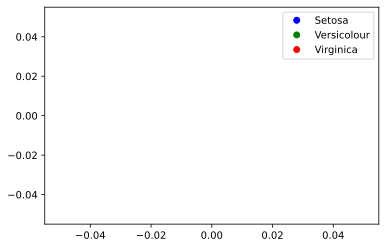

In [65]:
#уменьшаем размерность и проверяем на RF
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=.3,random_state=42)
search_forest.fit(X_train, y_train)


NameError: name 'y_pred' is not defined

In [67]:
preds = search_forest.predict(X_test)
metrics.mean_absolute_error(y_test, preds)

2.223519157898573

In [70]:
df_errors

,Model,MAE,RMSE
0,LinearRegression,2.282,2.899
1,SGD,2.286,2.903
2,DT,2.285,2.933
3,RF,2.249,2.852


In [28]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [29]:
df1=pd.read_csv('df1.csv', index_col=['дата'],parse_dates=['дата'])

In [36]:
plotly_df(df1[['[Cu]','[Fe]']], title = "Cu")

In [32]:
df1

,Unnamed: 0,"давление КВС, точка1","давление КВС, точка2",давление природный газ,"конвейер 31, производительность","конвейер 31, скорость","конвейер 32, производительность","конвейер 32, скорость","питатель1, уровень","питатель1, скорость",...,"температура пода, штейновый сифон","температура пода, зона плавления, точка1","температура пода, зона плавления, точка2",температура природного газа,[Cu],[Ni],[Fe],[S],Суммарный расход шихты,"температура пода, зона плавления"
дата,,,,,,,,,,,,,,,,,,,,,
2008-01-01 01:00:00,0,97.57563,92.91371,99.08217,76.45261,99.40741,0.00000,100.0,3.976667,20.25208,...,330.1903,519.5614,497.8037,35.46500,65.1,3.73,9.0,22.0,76.45261,508.68255
2008-01-01 03:00:00,1,96.97694,92.14818,94.77848,73.87099,99.70370,0.00000,100.0,4.040802,24.25916,...,329.2344,519.2008,496.6901,35.40271,64.6,3.74,9.4,22.2,73.87099,507.94545
2008-01-01 05:00:00,2,97.31064,92.36410,90.27850,78.19254,99.25926,0.00000,100.0,1.364270,22.25410,...,329.3814,520.5351,495.5406,34.53092,61.6,3.65,10.9,22.8,78.19254,508.03785
2008-01-01 07:00:00,3,96.77084,91.86356,96.07891,68.95585,99.25926,0.00000,100.0,3.823516,21.26530,...,328.3155,523.9964,510.5779,34.28186,59.2,3.52,13.6,23.1,68.95585,517.28715
2008-01-01 09:00:00,4,98.65033,94.38589,94.76867,53.46925,99.55556,0.00000,100.0,1.053408,0.00000,...,327.2856,520.7154,497.0496,32.53829,55.0,3.49,16.9,23.8,53.46925,508.88250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-06-02 07:00:00,1696,99.72502,94.22887,96.62852,96.21365,100.00000,62.41385,100.0,3.145270,28.26929,...,269.8370,512.8516,531.6013,17.20270,56.9,3.10,15.3,23.2,158.62750,522.22645
2008-06-02 09:00:00,1697,94.89135,89.06640,93.65471,87.11830,99.77778,46.20490,100.0,3.875377,25.26933,...,274.1383,514.2949,533.2948,16.93446,55.8,3.30,15.9,23.9,133.32320,523.79485
2008-06-02 11:00:00,1698,95.03366,89.50806,93.59583,90.09879,99.85185,48.37195,100.0,3.058698,27.26829,...,260.4218,507.6899,525.5825,16.58369,54.1,3.32,17.2,24.2,138.47074,516.63620
